<h1 style="text-align: center"> Segmentação de Clientes </h1>
<img src="https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png" style="margin: auto">

Neste projeto, vamos fazer um trabalho de segmentação de clientes. O intuito é poder fazer campanhas mais direcionadas a um determinado público que tem uma maior propensão ao consumo de um produto, tipo de oferta etc.. Com isso, reduzimos o custo por aquisição de clientes (CPA) devido ao aumento da probabilidade de compra. 

Para começarmos, vou falar sobre o framework STP. Ele é um conceito que se baseia na Segmentação, Targeting e Posicionamento. 

<ol>
    <li> <strong>Segmentação</strong>: é o processo de separar os nossos clientes em grupos que compartilham características comportamentais semelhantes. Se fizermos observações dentro de um mesmo grupo, iremos observar comportamentos de compra e reações a ofertas de forma bem similar.
    <li> <strong>Targeting</strong>: é o processo de mensurar o lucro potencial de cada grupo e decidir em qual deles focar. Um dos critérios a serem analisados é o seu tamanho atual, potencial de crescimento e as ofertas dos concorrentes. Além disso, aqui é onde você irá selecionar os meios de veiculação do anúncio (TV, online, outdoor etc.).
    <li> <strong>Posicionamento</strong>: aqui é onde você vai pensar em qual é(são) o(s) produto(s) que se enquadra(m) mais com as características e necessidades do seu segmento. Mostra como o produto deve ser apresentado ao cliente e através de qual meio. 
</ol>

<br>
Agora, vamos falar sobre Marketing Mix. Basicamente, Marketing Mix é você desenvolver o melhor produto para o seu segmento com o preço certo e apresentá-lo através dos canais certos.

Neste projeto de análise de clientes, vamos focar em responder 3 perguntas:

<ol>
    <li> O cliente irá comprar um produto de uma determinada categoria quando ele entrar na loja?
    <li> Qual marca ele irá escolher?
    <li> Quantas unidades do produto ele irá comprar?
</ol>


Essas 3 perguntas se baseiam no comportamento do cliente quando ele entra em uma loja. Primeiramente, ele se pergunta se vai ou não comprar um determinado produto (probabilidade de compra). Depois, caso ele decida que irá comprar, ele pensa de qual marca será. Após decidir a marca, ele pensa em quantos produtos irá levar daquela marca.  


Esses questionamentos fazem parte do que chamamos de os 4P's do Marketing: Produto, Preço, Promoção e Posicionamento. 

<h1 style="text-align: center"> Descrição do banco de dados </h1>

Agora, vamos fazer a apresentação do dataset que iremos utilizar:

<ul>
    <li> ID - Identificador do cliente
    <li> Sex - Gênero (0 -> Homem, 1 -> Mulher)
    <li> Marital status - Estado civil (0 -> Solteiro, 1 -> Não solteiro)
    <li> Age - Idade
    <li> Education - Nível de educação (0 -> Outro/Desconhecido, 1 -> Ensino Médio, 2 -> Ensino Superior, 3 -> Pós-graduação)
    <li> Income - Salário anual declarado em dólares americanos
    <li> Occupation - Categoria do emprego (0 -> Desempregado, 1 -> Funcionário qualificado, 2 -> Funcionário altamente qualificado ou empreendedor)
    <li> Settlement size - Tamanho da cidade que o consumidor vive (0 -> Pequena, 1 -> Médio porte, 2 -> Cidade grande)
</ul>

In [1]:
# Bibliotecas que vamos utilizar
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from warnings import filterwarnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import pickle

filterwarnings('ignore')

In [2]:
# Importanto o banco de dados
df = pd.read_csv(r'C:\Users\Anwar\Desktop\Projects Jupyter\datasets\Segmentation\segmentation data.csv', encoding = 'cp1252', low_memory = True)

In [3]:
# Visualizando as primeiras 5 linhas
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
# Dimensões do dataset
print(f"Nosso dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas")

Nosso dataset possui 2000 linhas e 8 colunas


In [5]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


Como podemos ver, há apenas valores inteiros (alguns, de fato, representam números inteiros e outros apenas variáveis categóricas codificadas) e não há valores faltantes.

In [6]:
# Breve análise estatística
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Com essa análise, podemos ver que a média de idade dos nossos clientes é de 36 anos e a média salarial é $ 121k. 

Para variáveis categóricas codificadas, podemos extrair algumas informações úteis caso ela possua dois valores (0 e 1). Neste caso, a média representa a proporção de clientes que pertencem à classe 1. As features "Sex" e "Marital satatus" satisfazem esse requisito. Logo, ao analisarmos a média, vemos que 45.7% são mulheres e 50.35% são solteiros.

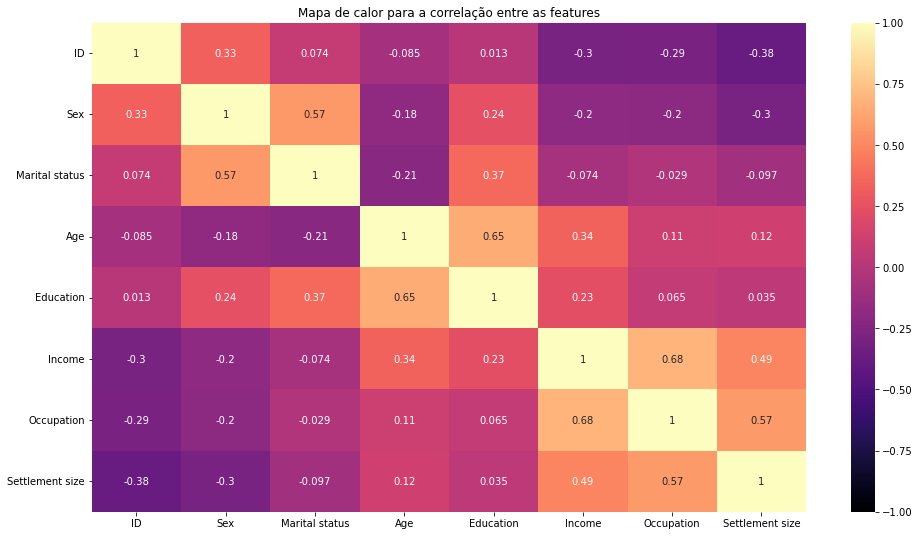

In [7]:
# Mapa de calor para a correlação
plt.figure(figsize = (16, 9))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'magma', annot = True)
plt.title("Mapa de calor para a correlação entre as features")
plt.show()

A partir desse mapa de calor, algumas correlações me chamaram atenção:

<ul>
    <li> Há uma correlação de 65% entre a idade e a educação, o que é esperado, visto que é necessário tempo para fazer uma graduação e pós-graduação. Com isso, a idade vai avançando.
    <li> A uma correlação positiva entre o tipo de profissão e o salário anual, o que também é esperado. Se uma pessoa possui uma profissão mais valorizada, maior será o seu salário anual.
    <li> Além disso, há uma correlação positiva de 57% entre o estado civil e o gênero.
</ul>

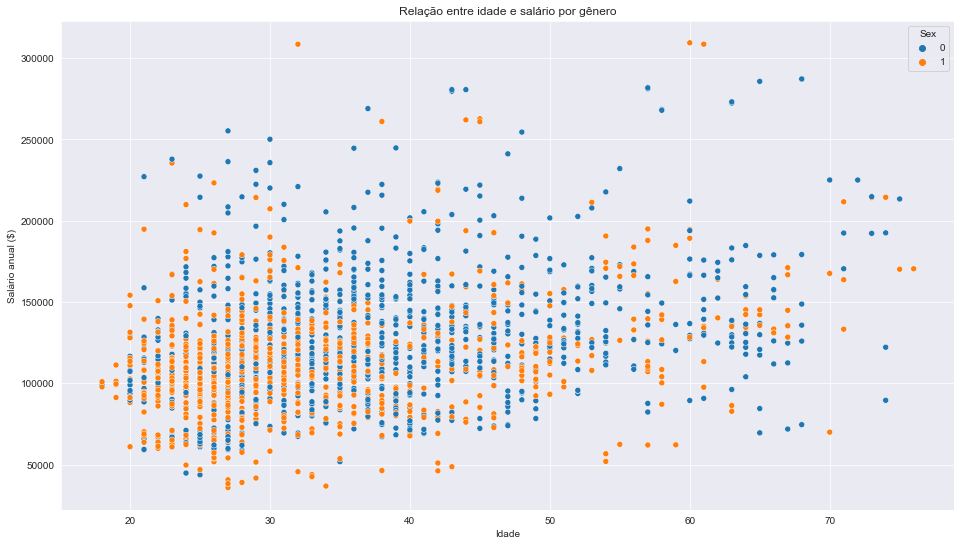

In [8]:
# Visualizando os dados com gráfico de dispersão
sns.set_style("darkgrid")
plt.figure(figsize = (16, 9))
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'Sex')
plt.title("Relação entre idade e salário por gênero")
plt.xlabel("Idade")
plt.ylabel("Salário anual ($)")
plt.show();

In [9]:
# Agora, vamos escalonar os nosso dados
scaler = StandardScaler()

df_scale = scaler.fit_transform(df)

df_scale = df_scale[:, [1, 2, 3, 4, 5, 6, 7]]

<h1 style="text-align: center"> Cluster Hierárquico </h1>

In [10]:
# Fazendo o clustering
hier_cluster = linkage(df_scale, method = 'ward')

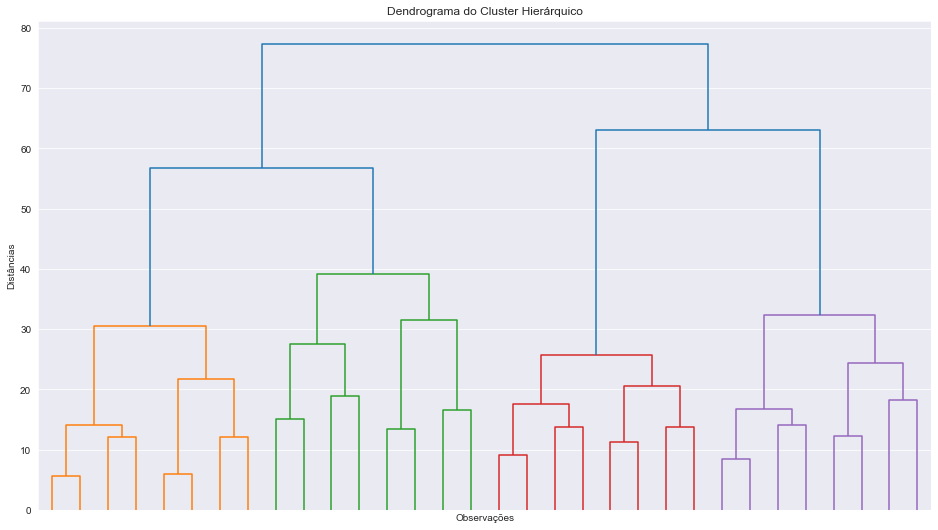

In [11]:
# Plotando o dendrograma
plt.figure(figsize = (16, 9))
dendrogram(hier_cluster,
           show_leaf_counts = False,
           truncate_mode = 'level',
           p = 4,
           no_labels = True)
plt.title("Dendrograma do Cluster Hierárquico")
plt.xlabel("Observações")
plt.ylabel("Distâncias")
plt.show();

Geralmente, utilizamos o cluster hierárquico para determinarmos quantos clusters os nossos dados terão. Porém, em conjuntos de dados maiores, ele pode demorar muito para ser processado. Por isso, utilizamos outras técnicas que veremos a seguir

<h1 style="text-align: center"> Cluster com o algoritmo K-Means </h1>

Para tarefas de segmentação, o algoritmo do K-Means funciona muito bem. Entretanto, a utilização desse algoritmo pode ter problemas em alguns casos.

Um exemplo seria a presença de outliers. Por ser um algoritmo que se baseia na minimização da norma euclidiana entre os centróides de cada cluster, isto é, tem forte relação com distâncias, ele é muito sensível a outliers. Para solucionar isso, podemos utilizar o K-Median clustering, porém é computacionalmente mais caro. Outro ponto importante é a necessidade de se definir o número K de clusters (por isso o <b>K</b>-Means) antes mesmo de fazer a segmentação.

In [12]:
# Criando um loop para plotar o gráfico de Inércia X K & Silhouette Score X K
inertias = []
silhouette = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df_scale)
    inertias.append(kmeans.inertia_)
    silhouettescore = silhouette_score(df_scale, kmeans.labels_)
    silhouette.append(silhouettescore)

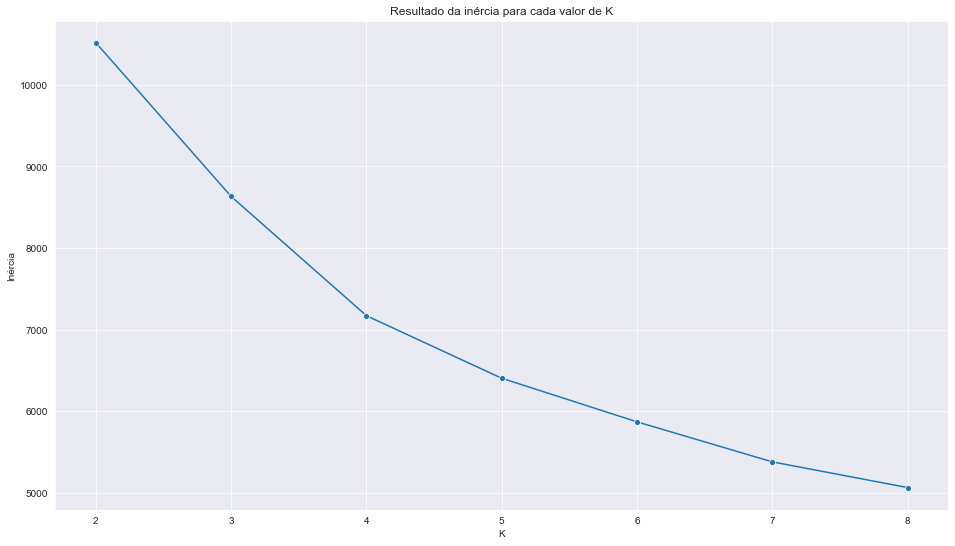

In [13]:
# Gráfico da Inécia X K
plt.figure(figsize = (16, 9))
sns.lineplot(x = range(2, 9), y = inertias, markers = True, marker = 'o')
plt.title("Resultado da inércia para cada valor de K")
plt.xlabel("K")
plt.ylabel("Inércia")
plt.show();

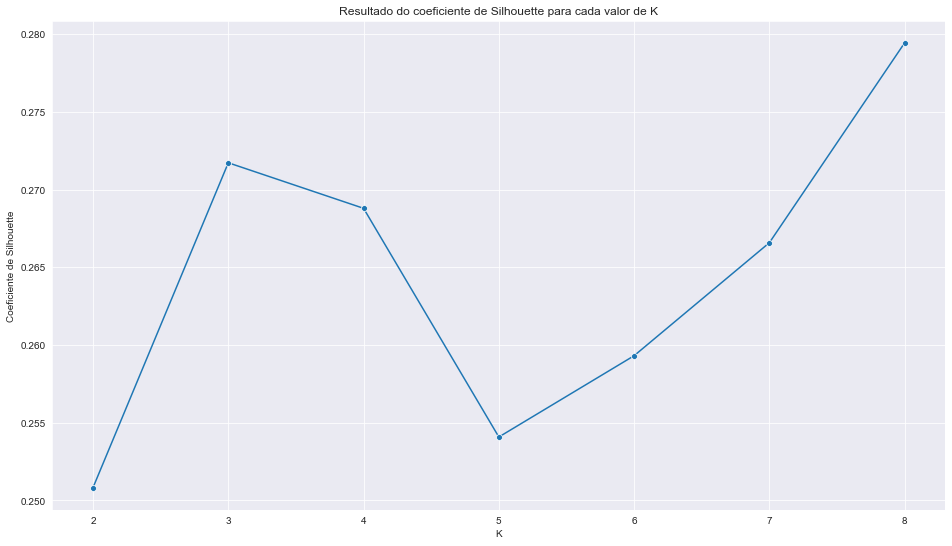

In [14]:
# Gráfico do coeficiente de Silhouette X K
plt.figure(figsize = (16, 9))
sns.lineplot(x = range(2, 9), y = silhouette, markers = True, marker = 'o')
plt.title("Resultado do coeficiente de Silhouette para cada valor de K")
plt.xlabel("K")
plt.ylabel("Coeficiente de Silhouette")
plt.show();

Como podemos ver, o número de clusters K = 4 parece ser um bom valor.

Agora, vamos criar um novo dataset auxiliar para podermos representar os clusters de forma visual. 

In [15]:
# Clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(df_scale)

KMeans(n_clusters=4, random_state=0)

In [16]:
# Criando novo dataframe
df_new = df.copy()

df_new.drop(columns = 'ID', axis = 1, inplace = True)

df_new["Cluster"] = kmeans.labels_

df_new.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


In [17]:
# Agrupando os dados por cluster
df_gp = df_new.groupby('Cluster').mean()

df_gp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


Com isso, podemos extrair algumas informações relevantes para segmentar o nosso público. Vamos dividir em grupo 1, 2, 3 e 4:

<ol>
    <li> A maioria é mulheres jovens em algum relacionamento com um bom salário (Média populacional) 
    <li> Pessoas solteiras com poucas oportunidades de carreira. (Poucas oportunidades)
    <li> A maioria é homens jovens e solteiros focados na carreira. (Foco na carreira)
    <li> Praticamente a mesma proporção de homens e mulheres com idade mais avançada, carreira estabilizada e alto nível educacional. (Bem de vida)
</ol>

In [18]:
# Observando a proporção de cada cluster
df_gp['Number of Observations'] = df_new.groupby('Cluster').count()['Sex'].to_list()

df_gp['Proportion'] = np.array(df_new.groupby('Cluster').count()['Sex'].to_list())/np.sum(df_new.groupby('Cluster').count()['Sex'].to_list())

df_gp.index = ["Média populacional", "Foco na carreira", "Poucas oportunidades", "Bem de vida"]

df_gp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Observations,Proportion
Média populacional,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Foco na carreira,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Poucas oportunidades,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Bem de vida,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


Como podemos ver, o maior grupo é aquele onde há a média populacional (35.25% das observações = 705 clientes)

In [19]:
# Substituindo os números dos clusters pelo resumo das características de cada cliente
df_new['Cluster'] = df_new['Cluster'].map({0: "Média populacional", 1: "Foco na carreira", 2: "Poucas oportunidades", 3: "Bem de vida"})

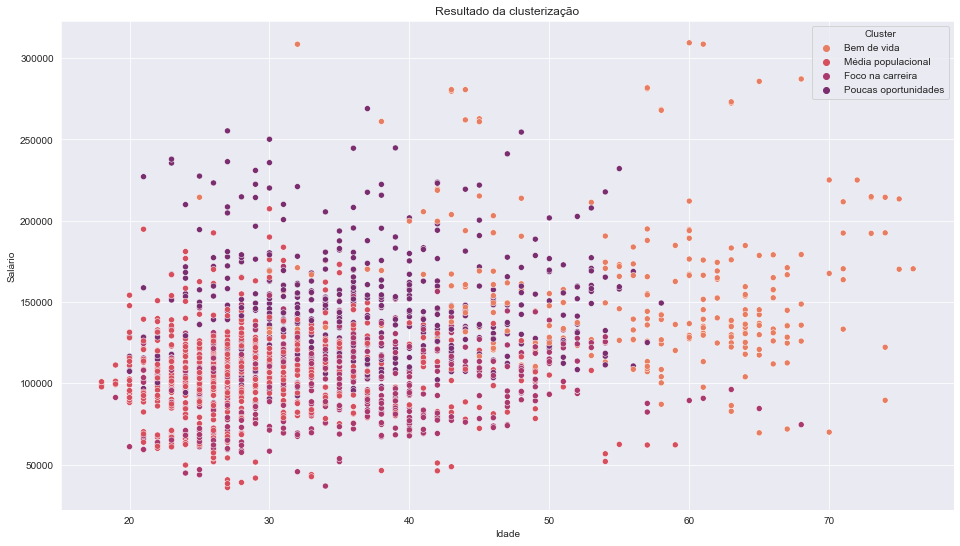

In [20]:
# Plotando o resultado em um gráfico de dispersão
plt.figure(figsize = (16, 9))
sns.scatterplot(data = df_new, x = 'Age', y = 'Income', hue = 'Cluster', palette = "flare")
plt.title("Resultado da clusterização")
plt.xlabel("Idade")
plt.ylabel("Salário")
plt.show();

Até aqui, o resultado está razoável. Conseguimos fazer uma pequena distinção entre os clientes, mas nada de tão satisfatório. Agora, vamos combinar duas técnicas: K-Means e PCA (Principal Component Analysis)

<h1 style="text-align: center">Análise de Componentes Principais (PCA)</h1>

In [147]:
# Instanciando a classe
pca = PCA()

In [148]:
# Aplicando PCA
pca.fit(df_scale)

PCA()

In [149]:
# Observando o quão influente cada feature é na variância dos dados
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [150]:
# Criando uma lista com a soma acumulada
cum_sum = [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(len(pca.explained_variance_ratio_))]

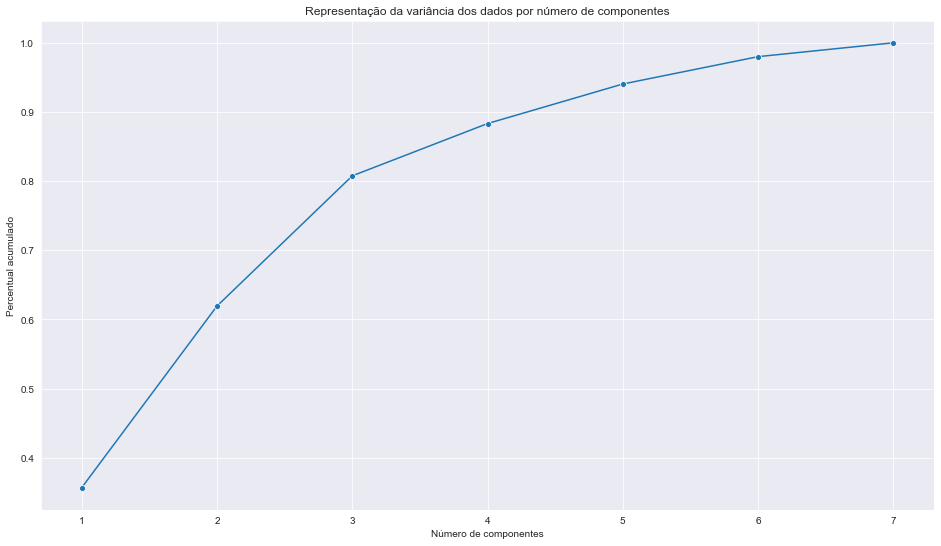

In [153]:
# Plotando um gráfico relacionando a soma acumulada da influência dos componentes
plt.figure(figsize = (16, 9))
sns.lineplot(x = range(1, 8), y = cum_sum, markers = True, marker = 'o')
plt.title("Representação da variância dos dados por número de componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Percentual acumulado")
plt.show();

Como podemos observar, os 3 primeiros componentes explicam 80.77% da variância dos nossos dados.

In [155]:
# Agora, vamos repetir o processo, porém definindo o número de componentes principais
pca = PCA(n_components = 3)

In [156]:
# Aplicando PCA
pca.fit(df_scale)

PCA(n_components=3)

In [157]:
# Visualizando os componentes principais
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [161]:
# Transformando em um dataframe para melhor visualização
df_comp = pd.DataFrame(data = pca.components_,
                       columns = df.columns[1:],
                       index = ["Componente 1", "Componente 2", "Componente 3"])

df_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Componente 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Componente 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Componente 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


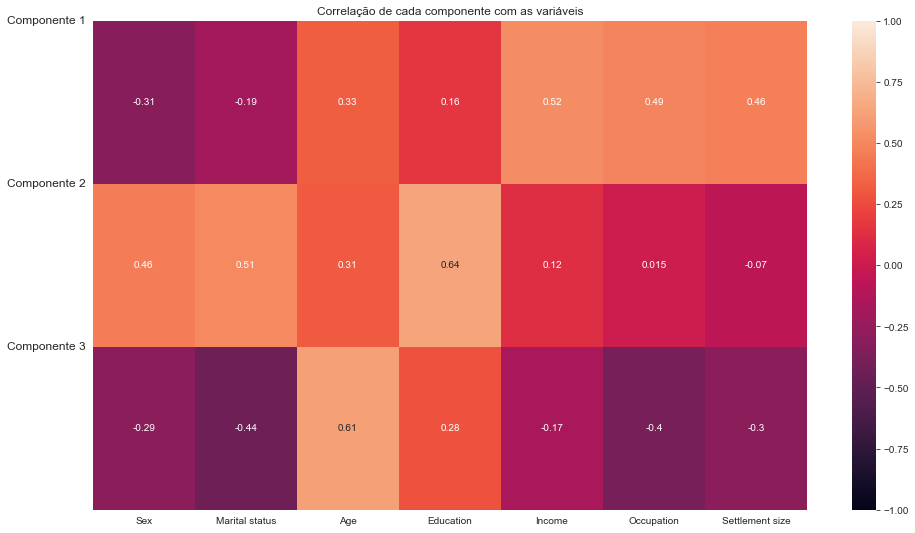

In [162]:
# Colocando em um HeatMap
plt.figure(figsize = (16, 9))
sns.heatmap(df_comp,
            vmin = -1,
            vmax = 1,
            annot = True)
plt.yticks([0, 1, 2], ["Componente 1", "Componente 2", "Componente 3"], rotation = 0, fontsize = 12)
plt.title("Correlação de cada componente com as variáveis")
plt.show();

In [165]:
# Agora, vamos transformar o nosso conjunto de dados escalonados
df_pca = pca.transform(df_scale)

df_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

<h1 style="text-align: center"> Aplicando K-Means com PCA </h1>

In [171]:
# Vamos repetir todo o processo
inertias = []
silhouette = []
for k in range(2, 9):
    kmeans_pca = KMeans(n_clusters = k, init = 'k-means++')
    kmeans_pca.fit(df_pca)
    inertias.append(kmeans_pca.inertia_)
    silhouettescore = silhouette_score(df_pca, kmeans_pca.labels_)
    silhouette.append(silhouettescore)

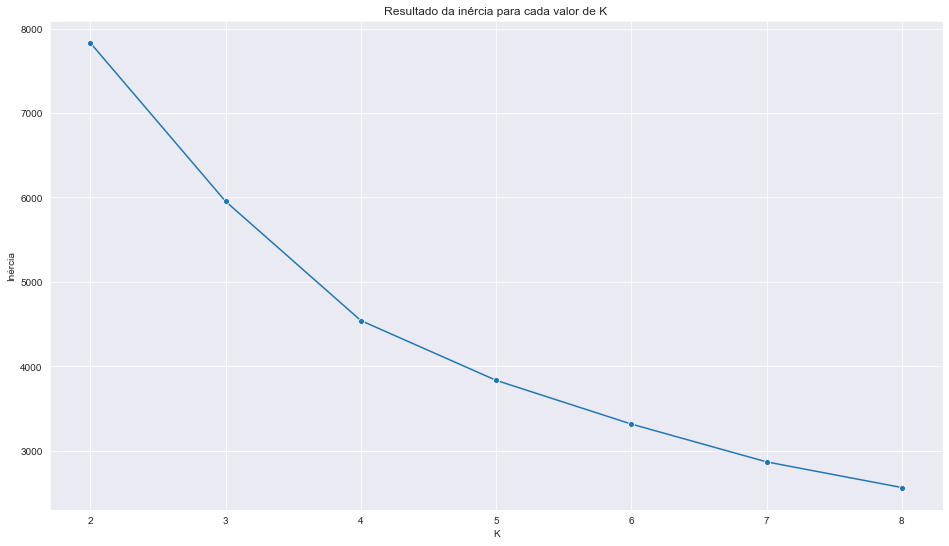

In [172]:
# Gráfico da Inécia X K
plt.figure(figsize = (16, 9))
sns.lineplot(x = range(2, 9), y = inertias, markers = True, marker = 'o')
plt.title("Resultado da inércia para cada valor de K")
plt.xlabel("K")
plt.ylabel("Inércia")
plt.show();

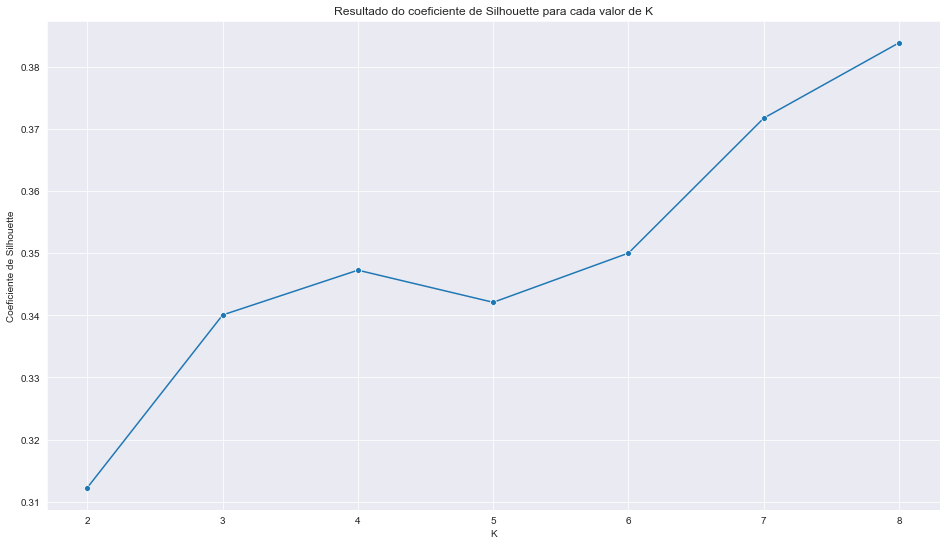

In [173]:
# Gráfico do coeficiente de Silhouette X K
plt.figure(figsize = (16, 9))
sns.lineplot(x = range(2, 9), y = silhouette, markers = True, marker = 'o')
plt.title("Resultado do coeficiente de Silhouette para cada valor de K")
plt.xlabel("K")
plt.ylabel("Coeficiente de Silhouette")
plt.show();

Novamente, 4 clusters parece ser o melhor para nós

In [178]:
# Aplicando PCA
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++')

kmeans_pca.fit(df_pca)

KMeans(n_clusters=4)

In [192]:
# Montando um dataframe para melhor visualização
df_result = pd.concat([df.drop(columns = 'ID', axis = 1), pd.DataFrame(df_pca), pd.DataFrame(kmeans_pca.labels_)], axis = 1)
df_result.columns.values[-4:] = ["Componente 1", "Componente 2", "Componente 3", "Cluster"]
df_result.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Componente 1,Componente 2,Componente 3,Cluster
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2


In [193]:
# Agrupando por cluster
df_gp_pca = df_result.groupby("Cluster").mean()
df_gp_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Componente 1,Componente 2,Componente 3
Cluster,,,,,,,,,,
0,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
1,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
3,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410


Novamente, podemos ver que os grupos que criamos anteriormente se repetem aqui! O que significa uma boa preservação na variância do nosso dataset 

In [194]:
# Observando a proporção de cada cluster
df_gp_pca['Number of Observations'] = df_result.groupby('Cluster').count()['Sex'].to_list()

df_gp_pca['Proportion'] = np.array(df_result.groupby('Cluster').count()['Sex'].to_list())/np.sum(df_result.groupby('Cluster').count()['Sex'].to_list())

df_gp_pca.index = ["Média populacional", "Foco na carreira", "Poucas oportunidades", "Bem de vida"]

df_gp_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Componente 1,Componente 2,Componente 3,Number of Observations,Proportion
Média populacional,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325
Foco na carreira,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Poucas oportunidades,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Bem de vida,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460


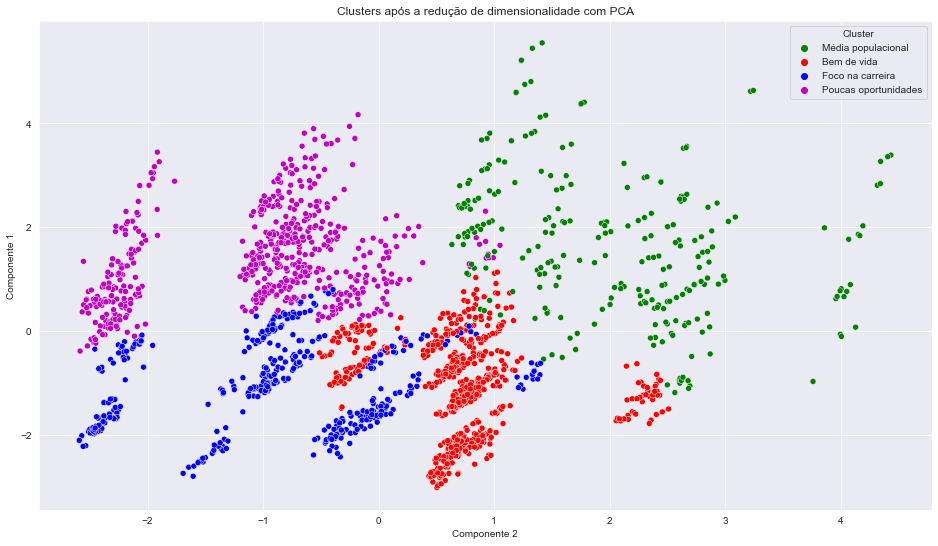

In [195]:
# Visualizando esse novo resultado em scatter plot
plt.figure(figsize = (16, 9))
df_result["Cluster"] = df_result["Cluster"].map({0: "Média populacional", 1: "Foco na carreira", 2: "Poucas oportunidades", 3: "Bem de vida"})
sns.scatterplot(data = df_result, x = 'Componente 2', y = 'Componente 1', hue = 'Cluster', palette = ['g', 'r', 'b', 'm'])
plt.title("Clusters após a redução de dimensionalidade com PCA")
plt.show();

Olhe o quanto ficou melhor! Tanto para a visualização quanto para a interpretação dos resultados.

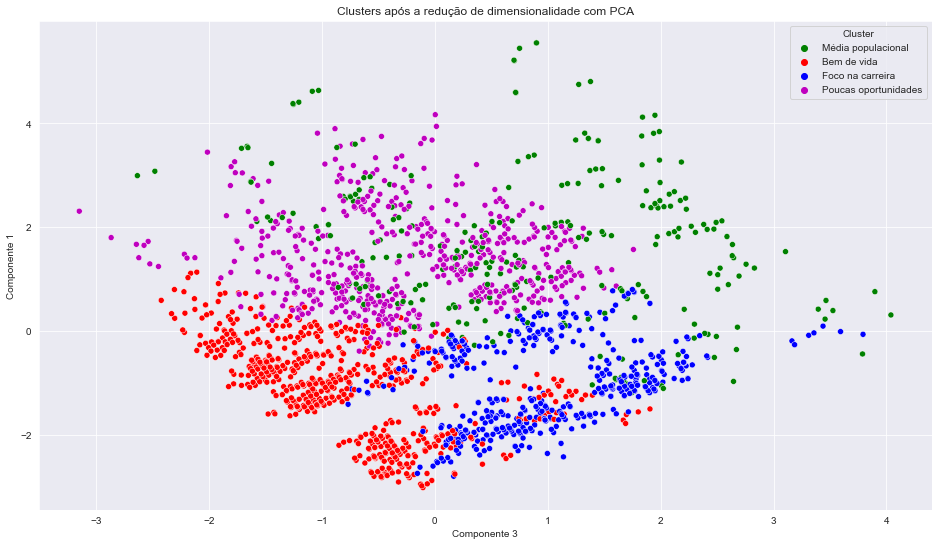

In [196]:
# Agora, vamos plotar os resultados com os componentes 1 e 3
plt.figure(figsize = (16, 9))
sns.scatterplot(data = df_result, x = 'Componente 3', y = 'Componente 1', hue = 'Cluster', palette = ['g', 'r', 'b', 'm'])
plt.title("Clusters após a redução de dimensionalidade com PCA")
plt.show();

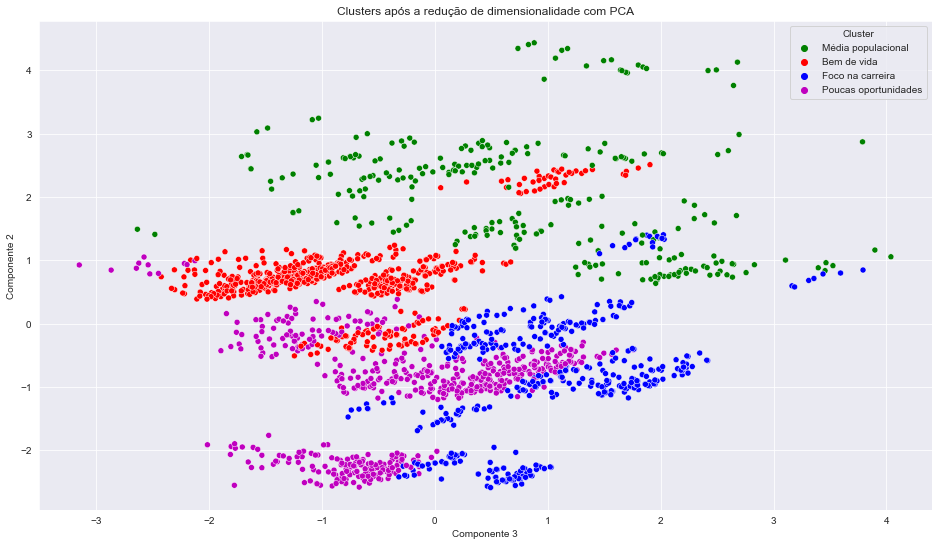

In [197]:
# Por fim, vamos plotar os resultados com os componentes 2 e 3
plt.figure(figsize = (16, 9))
sns.scatterplot(data = df_result, x = 'Componente 3', y = 'Componente 2', hue = 'Cluster', palette = ['g', 'r', 'b', 'm'])
plt.title("Clusters após a redução de dimensionalidade com PCA")
plt.show();

<h1 style="text-align: center"> Exportação de Dados com Pickle </h1>

In [199]:
# A primeira coisa que precisamos exportar é o nosso scaler
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [200]:
# A instância do PCA
pickle.dump(pca, open("pca.pickle", 'wb'))

In [201]:
# Por fim, a instância do K-Means
pickle.dump(kmeans_pca, open("kmeans_pca.pickle", "wb"))